What is the most optimal skill pto learn for Data Analysts?

Methodology

1. Group skills to determine median salary and likelihood of being in posging
2. visually median salary vs percent skill demand
3. (optional) Determine if certain technologies are more prevalent

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\envs\data_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [54]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]


df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


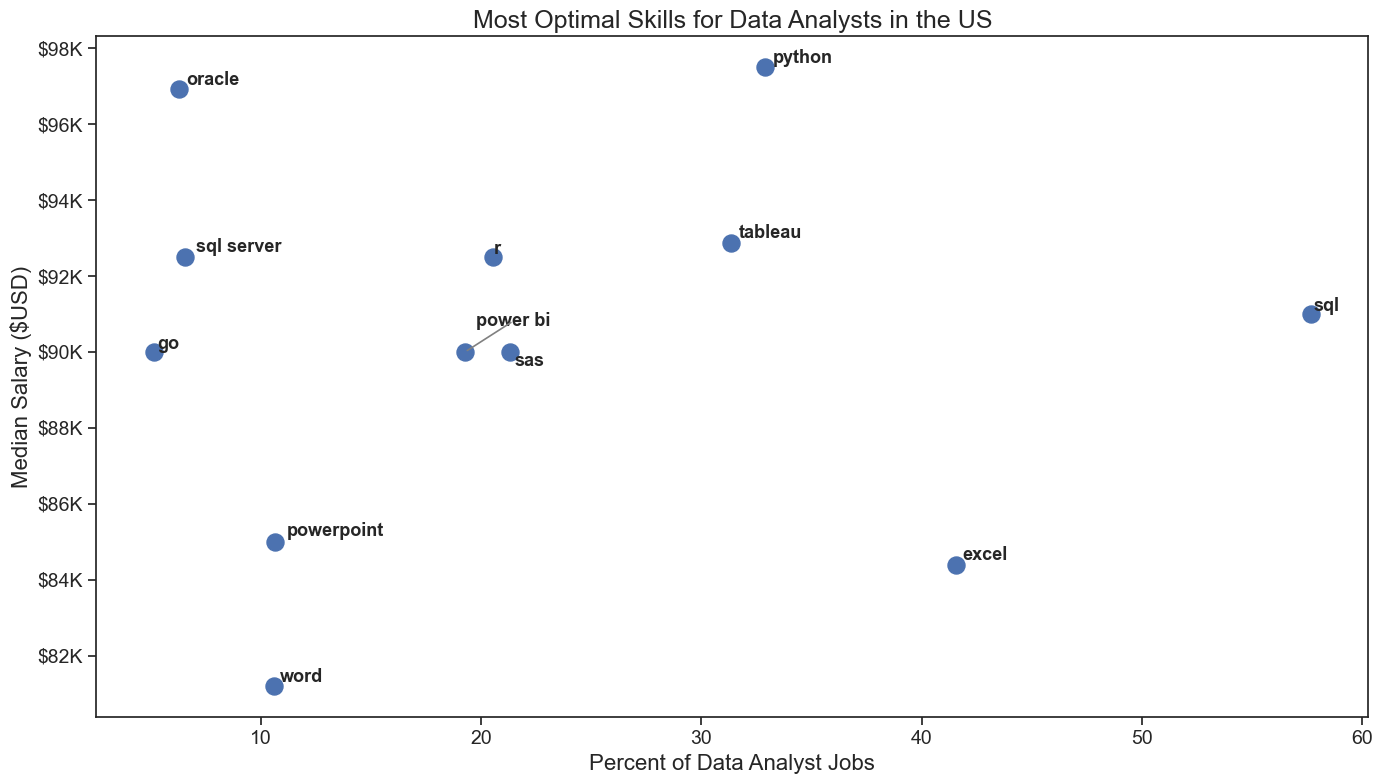

In [65]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # figure size can stay the same

plt.scatter(
    df_DA_skills_high_demand['skill_percent'],
    df_DA_skills_high_demand['median_salary'],
    s=150  # BIGGER points
)

plt.xlabel('Percent of Data Analyst Jobs', fontsize=16)
plt.ylabel('Median Salary ($USD)', fontsize=16)
plt.title('Most Optimal Skills for Data Analysts in the US', fontsize=18)

# Get axis
ax = plt.gca()

# Bigger tick labels
ax.tick_params(axis='both', labelsize=14)

# Format y-axis
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)

# Add labels to points (bigger text)
texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            skill,
            fontsize=13,      # BIGGER label text
            weight='bold'
        )
    )

# Adjust text to avoid overlap
adjust_text(
    texts,
    expand_points=(1.6, 1.8),
    expand_text=(1.6, 1.8),
    force_text=0.8,
    force_points=0.6,
    arrowprops=dict(arrowstyle='-', color='gray', lw=1.2)  # thicker arrows
)

plt.tight_layout()
plt.show()


In [17]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [19]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'powerpoint',
  'power bi',
  'splunk',
  'msaccess',
  'alteryx',
  'esquisse',
  'dax',
  'sharepoint',
  'word',
  'spreadsheet',
  'nuix',
  'cognos',
  'ssrs',
  'outlook',
  'powerbi',
  'ssis',
  'looker',
  'visio',
  'sheets',
  'excel',
  'spss',
  'ms access',
  'tableau',
  'datarobot',
  'qlik',
  'sas',
  'microstrategy'],
 'programming': ['clojure',
  'visualbasic',
  'mongo',
  'apl',
  'no-sql',
  'bash',
  'c#',
  'kotlin',
  'rust',
  'lisp',
  'delphi',
  'sas',
  'f#',
  'solidity',
  'sql',
  'perl',
  'html',
  'vba',
  'mongodb',
  'javascript',
  'fortran',
  'lua',
  'ruby',
  'powershell',
  'c',
  'haskell',
  'visual basic',
  'pascal',
  'cobol',
  'ocaml',
  'python',
  'java',
  'julia',
  't-sql',
  'typescript',
  'crystal',
  'groovy',
  'erlang',
  'r',
  'swift',
  'golang',
  'shell',
  'scala',
  'assembly',
  'vb.net',
  'php',
  'objective-c',
  'elixir',
  'nosql',
  'go',
  'css',
  'sass',
  'dart',
  'matlab',
  '

In [24]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,powerpoint
0,analyst_tools,power bi
0,analyst_tools,splunk
0,analyst_tools,msaccess
...,...,...
9,sync,slack
9,sync,ringcentral
9,sync,zoom
9,sync,webex


In [29]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

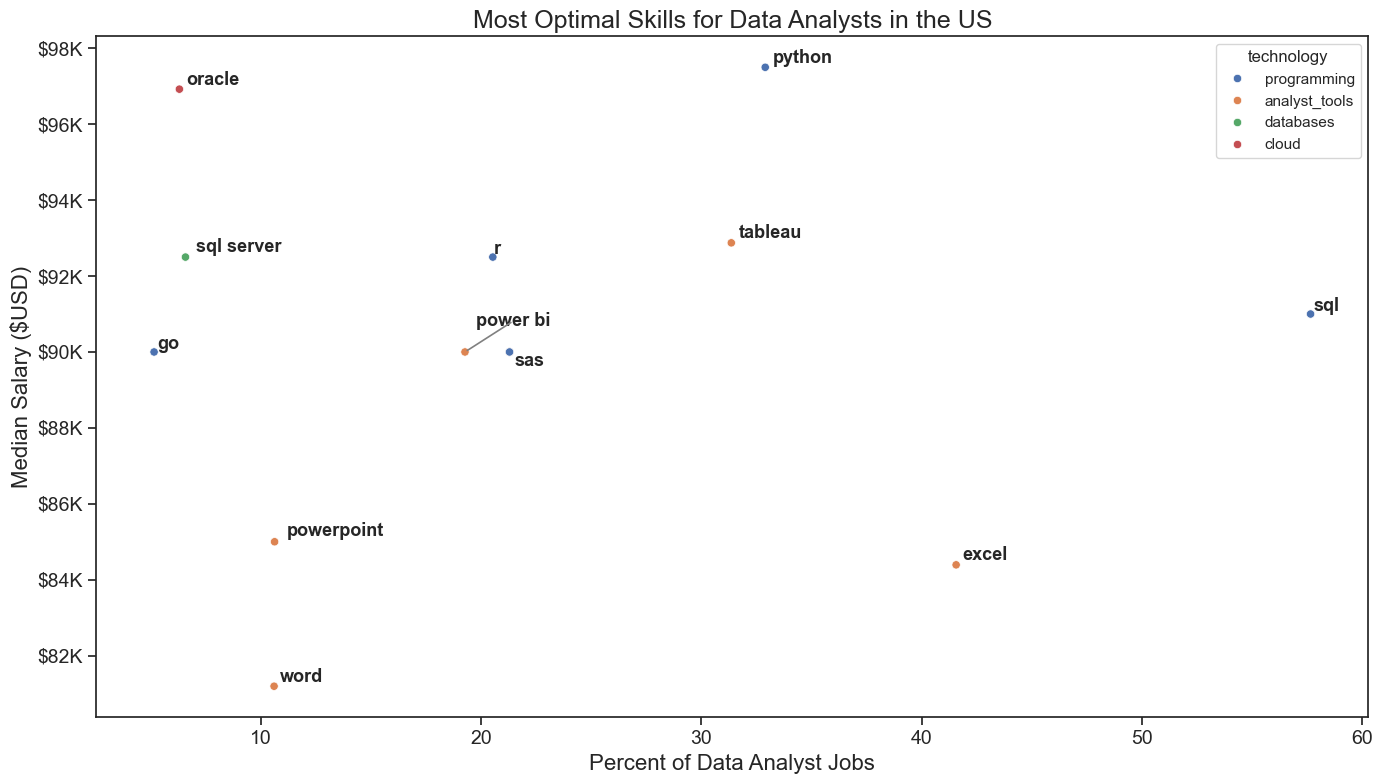

In [67]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # figure size can stay the same

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
plt.xlabel('Percent of Data Analyst Jobs', fontsize=16)
plt.ylabel('Median Salary ($USD)', fontsize=16)
plt.title('Most Optimal Skills for Data Analysts in the US', fontsize=18)

# Get axis
ax = plt.gca()

# Bigger tick labels
ax.tick_params(axis='both', labelsize=14)

# Format y-axis
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)

# Add labels to points (bigger text)
texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            skill,
            fontsize=13,      # BIGGER label text
            weight='bold'
        )
    )

# Adjust text to avoid overlap
adjust_text(
    texts,
    expand_points=(1.6, 1.8),
    expand_text=(1.6, 1.8),
    force_text=0.8,
    force_points=0.6,
    arrowprops=dict(arrowstyle='-', color='gray', lw=1.2)  # thicker arrows
)

plt.tight_layout()
plt.show()
